# Taller SVM

David Esteban Casallas Meneses

# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.


1) En ambos casos tenemos un problema de clasificación binaria, en el primero debemos decir si el billete es falso o no, mientras que en el segundo debemos decir si una oficina se encuentra ocupada o no.

2) Primer problema: Los atributos que nos dan para clasificar los billetes son:


1.   La varianza de imagen Wavelet-transformada, una medida de dispersión de los datos en torno a la media utilizando la transformación de Wavelet para obtener las caracteristicas de una imagen.
2.   La asimetría de la imagen Wavelet-transformada, una medida que permite establecer el grado de simetría que presenta la distribución de la imagen utilizando la tranformación de Wavelet.
3.  La curtosis de la imagen Wavelet transformada, una medida estadistica que determina el grado de concentración que presentan los valores alrededor de una zona central de la distribución de frecuencias utilizando la transformación de Wavelet.
4.  Entropía de la imagen, es una medida estadistica de aleatoriedad que se puede utilizar para caracterizar la textura de la imagen de entrada.
5.  Clase, especifica si el elemento es un billete real o no.

Y para los label que se manejan en este problema tenemos "1" si el billete es verdadero y "0" si el billete es falso. Son los mismos valores que tiene el atributo clase.

Segundo problema: Los atributos que nos dan para clasificar si la oficina se encuentra ocupada o no son:



1.   Fecha-hora:minuto:segundo, medida del tiempo.
2.   Temperatura en Celsius, magnitud escalar que se define como la cantidad de energía cínetica de las partículas de una masa gaseosa.
3.  Humedad relativa en porcentaje, es la relación entre la presión parcial del vapor del agua y la presión de vapor de equilibrio del agua a una temperatura dada.
4.  Luz en Lux, es la medida del nivel de iluminación.
5.  Dioxido de carbono en ppm, la medida del nivel de dioxido de carbono en un espacio.
6.  La razón de la humedad, es una medida derivada de la temperatura y la humedad relativa dada en kilogramos de vapor de agua sobre kilogramos de aire.
7.  La ocupación, especifica si la oficina se encuentra ocupada o no.

Y para los label que se manejan en este problema tenemos "1" si la oficina está ocupada y "0" si la oficina no está ocupada. Son los mismos valores que tiene el atributo ocupación.


### Para responder el punto 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/data_banknote_authentication.txt', sep=",", header=None)
data.columns = ["a", "b", "c", "d", "e"]

In [2]:
data.head()

,a,b,c,d,e
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
from sklearn.linear_model import Perceptron

X = data[["a","b","c","d"]]
y = data["e"]

# We use the perceptron from sklearn to check linear separability
clf = Perceptron(random_state=1)
clf.fit(X,y)

print(clf.score(X, y))

X_1 = X
y_1 = y

0.9883381924198251


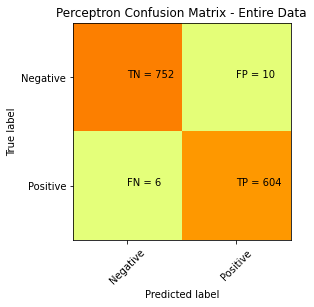

In [4]:
from sklearn.metrics import confusion_matrix

predicted = clf.predict(X)

# We can check the confusion matrix to understand the behavior of the model

cm = confusion_matrix(y, predicted)
 
plt.clf() 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Perceptron Confusion Matrix - Entire Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
  
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Note que tanto los falsos positivos cómo los falsos negativos tienen un valor mucho menor a los verdaderos positivos y los verdaderos negativos

In [5]:
data2 = pd.read_csv('/content/datatraining.txt', sep=",", header=None)
data2.columns = ["a", "b", "c", "d", "e","f","g","h"]

data3 = pd.read_csv('/content/datatest.txt', sep=",", header=None)
data3.columns = ["a", "b", "c", "d", "e","f","g","h"]

data3_2 = pd.read_csv('/content/datatest2.txt', sep=",", header=None)
data3_2.columns = ["a", "b", "c", "d", "e","f","g","h"]

data2 = data2.drop(["a"], axis=1)
data3 = data3.drop(["a"], axis=1)
data3_2 = data3_2.drop(["a"], axis=1)


data2['b'] = data2['b'].apply(lambda x: pd.Timestamp(x).to_julian_date())
data3['b'] = data3['b'].apply(lambda x: pd.Timestamp(x).to_julian_date())
data3_2['b'] = data3_2['b'].apply(lambda x: pd.Timestamp(x).to_julian_date())

data2.head()

,b,c,d,e,f,g,h
0,2.457058e+06,23.18,27.2720,426.0,721.25,0.004793,1
1,2.457058e+06,23.15,27.2675,429.5,714.00,0.004783,1
2,2.457058e+06,23.15,27.2450,426.0,713.50,0.004779,1
3,2.457058e+06,23.15,27.2000,426.0,708.25,0.004772,1
4,2.457058e+06,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
X = data2[["b","c","d","e","f","g"]]
y = data2["h"]


clf = Perceptron(random_state=1)
clf.fit(X,y)

clf.score(X, y)

0.7979860002456097

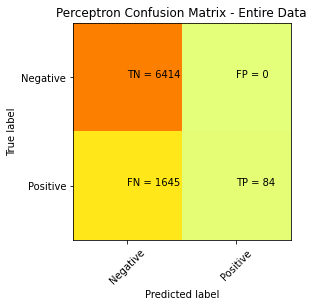

In [7]:
predicted = clf.predict(X)

cm = confusion_matrix(y, predicted)
 
plt.clf() 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Perceptron Confusion Matrix - Entire Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
  
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

En este caso para el dataset número 2 con solo los datos de entrenamiento tenemos un pesimo rendimiento, el error se concentra en las falsos negativos.

In [8]:
data4 = pd.concat([data2,data3,data3_2])

data4.head()

,b,c,d,e,f,g,h
0,2.457058e+06,23.18,27.2720,426.0,721.25,0.004793,1
1,2.457058e+06,23.15,27.2675,429.5,714.00,0.004783,1
2,2.457058e+06,23.15,27.2450,426.0,713.50,0.004779,1
3,2.457058e+06,23.15,27.2000,426.0,708.25,0.004772,1
4,2.457058e+06,23.10,27.2000,426.0,704.50,0.004757,1


In [30]:
X = data4[["c","d","e","f","g"]]
y = data4["h"]


clf = Perceptron(random_state=1)
clf.fit(X,y)

print(clf.score(X, y))

X_2 = X
y_2 = y

0.9886673151750973


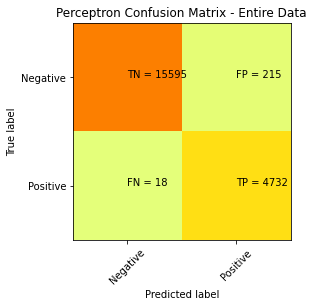

In [31]:
predicted = clf.predict(X)

cm = confusion_matrix(y, predicted)
 
plt.clf() 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Perceptron Confusion Matrix - Entire Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
  
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Una vez que agregamos más datos los valores en los que falla disminuyen, es interesante incluso notar que la tendencia a fallar cambia de los falsos negativos a los falsos positivos.

A) Para verificar que los datos sean linealmente separables se utiliza el algoritmo del perceptrón creado por Frank Rosenblatt e implementado en la libreria sklearn. En esta implementación el perceptrón no arroja simplemente la recta o un error, más bien retorna la mejor recta que divide el conjunto de los datos y luego podemos verificar si logra clasificar exitosamente cada uno de los datos. Cómo se muestra en las gráficas el perceptrón no encontró una línea recta que pudiera clasificar cada uno de los datos de forma correcta, para el primer dataset encontró una recta con una eficiencia del 98.8% y sin embargo para el segundo dataser solo encontró una con una tasa del 79.9%. Es importante notar que para el segundo dataset no estamos evaluando todos los datos, sin embargo está claro que si una recta no es capaz de separar los subconjuntos de los conjuntos que los cubren entonces no va a existir una recta que separe los conjuntos más grandes.

B) Si lo pensamos a gran escala, los dataset no fueron elegidos de forma completamente aleatoria, en el caso de los billetes hablamos de la moneda especifica de un país y además estrictamente en un lapso de tiempo especifico, es decir que intentar clasificar un billete de otro país o del mismo país solo que en otro momento cuándo el diseño de los mismos haya cambiado no va a funcionar. El segundo dataset tiene información de una oficina en una región especifica, es decir que en zonas con diferentes humedades o países en dónde el contenido de CO2 en el aire sea mayor, tendríamos clasificaciones erroneas. Si lo pensamos a pequeña escala en dónde tenemos un control de lo que va a llegar a clasificar el modelo entonces podemos asumir que os datos fueron elegidos de manera aleatoria para ese problema en específico, más aún si no tenemos este criterio básico ni siquiera podríamos crear un modelo ya que es una de las condiciones imprescindibles.

C) Si bien se sabe que a mayor cantidad de parametros se aumenta el error en las pruebas y se disminuye el error en el entrenamiento (overfitting), para estos problemas podemos aplicar algoritmos de reducción de dimensionalidad cómo lo es el ánalisis de componentes principales, eliminación de características hacia atrás, relación de valores faltantes y bosque aleatorio. Cosas incluso más elementales cómo evaluar la correlación de los parametros con el objetivo nos ayuda a eliminar posibles parametros que nos provoquen un overfitting. Sin embargo el overfitting ni siquiera es el único de los problemas, y aunque existen condiciones que buscan una formula para la generalización posible de un modelo existen factores qué no se consideran, por el ejemplo que el dataset sea lo suficientmenet diverso.

Para el caso del primer dataset al tener una recta con éxito del 98% podríamos pensar que tenemos suficientes datos para generar predicciones decentes, y cómo no es una recta que funciona el 100% de las veces no tenemos razón para sospechar de un overfitting. En el caso del segundo dataset parece que no tenemos suficientes datos, un éxito del 80% para este tipo de clasificaciones no parece muy satisfactorio sin embargo luego de agregar más elementos al dataset de entrenamiento (concatenando los datos de prueba 1 y prueba 2) tenemos ahora una recta que predice el dataset con un 98% de éxito, esto significa que los datos etiquetados para entrenamiento no eran suficientes para tener una buena generalización.

En los puntos 4, 5 y 6 vamos a realizar el entrenamiento de los modelos con almenos dos subconjuntos de la base de datos, uno para realizar el entrenamiento y otro para realizar unas pruebas que nos van a ayudar a evaluar la generalización.

### Para responder los puntos puntos 4, 5 y 6

In [12]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

4) Debido a qué el método del código proporcionado por el profe tenía problemas desde su planteamiento, vamos entonces a utilizar un planteamiento diferente para crear nuestra Support Vector Machine, en este caso utilizando el método de gradiente en decenso.

In [13]:
import numpy as np

class SVM:
    
    def __init__(self, C=1.0):
        # Constructor function that initializes the class variables
        self.C = C  # error term
        self.w = 0
        self.b = 0
    
    def hingeloss(self, w, b, x, y):
        # Calculates the Hinge Loss function
        reg = 0.5 * (w * w)  # Regularizer term
        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            # Calculating loss
            loss = reg + self.C * max(0, 1 - opt_term)
        return loss[0][0]
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # Function that trains the SVM model
        n_features = X.shape[1]  # Number of features in X
        n_samples = X.shape[0]  # Number of samples in X
        c = self.C
        ids = np.arange(n_samples)  # Creating ids from 0 to n_samples-1
        np.random.shuffle(ids)  # Shuffling the samples randomly
        w = np.zeros((1, n_features))  # Creating an array of zeros for weights
        b = 0  # Bias initialization
        losses = []  # To store losses after each epoch
        
        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)
            # Appending all losses
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, n_samples, batch_size):
                gradw = 0  # To store the gradient of w
                gradb = 0  # To store the gradient of b
                
                for j in range(batch_initial, batch_initial+batch_size):
                    if j < n_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)  # Prediction
                        
                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients
                            # w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]
                
                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        # Storing the final weights and bias
        self.w = w
        self.b = b
        
        # Returning the weights, bias and losses
        return self.w, self.b, losses
    
    def predict(self, X):
        # Function to predict the output for given input
        prediction = np.dot(X, self.w[0]) + self.b  # w.x + b
        return np.sign(prediction)


5 y 6) Ahora vamos a utilizar este código para crear dos modelos para nuestros respectivos datasets.

In [37]:
# Replace the 0 by -1 so the SVM works
y_1 = y_1.replace(0,-1)
y_2 = y_2.replace(0,-1)

# Divide the dataset into training, validation and testing
X_1r, X_1t0, y_1r, y_1t0 = train_test_split(X_1, y_1, test_size=0.33, random_state=42)
X_1t1, X_1t2, y_1t1, y_1t2 = train_test_split(X_1t0, y_1t0, test_size=0.5, random_state=42)

X_2r, X_2t0, y_2r, y_2t0 = train_test_split(X_2, y_2, test_size=0.15, random_state=20)
X_2t1, X_2t2, y_2t1, y_2t2 = train_test_split(X_2t0, y_2t0, test_size=0.5, random_state=20)

In [38]:
classifier_1 = SVM()
classifier_2 = SVM()

trainer1 = classifier_1.fit(np.array(X_1r),np.array(y_1r))
trainer2 = classifier_2.fit(np.array(X_2r),np.array(y_2r))

Luego de entrenar el modelo ahora podemos utilizar una función de error para saber qué tan bueno es el modelo que hemos creado. En particular para el punto 5) vamos a tomar algunos valores de nuestros conjunto de prueba de las bases de datos y observar cómo son clasificados por los modelos. Para el punto 6) vamos a comprobar qué tan bueno fue el modelo en el paso de verificación y luego en el paso de pueba, note que estos valores no deberian ser ni muy diferentes ni muy grandes.

In [39]:
#Validation
guess1 = classifier_1.predict(np.array(X_1t1))
print(np.sum((guess1 - np.array(y_1t1))**2)/len(np.array(y_1t1)))

#Test
guess1 = classifier_1.predict(np.array(X_1t2))
print(np.sum((guess1 - np.array(y_1t2))**2)/len(np.array(y_1t2)))

0.05309734513274336
0.01762114537444934


5) Acá podemos evidenciar dos ejemplos claros en dónde el modelo acertó con la clasificación para el dataset de la clasificaciónde billetes.

In [40]:
print("Parametros: ", np.array(X_1t2)[0])
print("Predicción: ", guess1[0])
print("Clasificación: ", np.array(y_1t2)[0])
print("\n")
print("Parametros: ", np.array(X_1t2)[200])
print("Predicción: ", guess1[200])
print("Clasificación: ", np.array(y_1t2)[200])

Parametros:  [-1.5621  -2.2121   4.2591   0.27972]
Predicción:  1.0
Clasificación:  1


Parametros:  [ 1.7939  -1.1174   1.5454  -0.26079]
Predicción:  -1.0
Clasificación:  -1


In [42]:
#Validation
guess2 = classifier_2.predict(np.array(X_2t1))
print(np.sum((guess2 - np.array(y_2t1))**2)/len(np.array(y_2t1)))

#Test
guess2 = classifier_2.predict(np.array(X_2t2))
print(np.sum((guess2 - np.array(y_2t2))**2)/len(np.array(y_2t2)))

0.21530479896238652
0.21530479896238652


5) Acá podemos evidenciar dos ejemplos claros en dónde el modelo acertó con la clasificación para el dataset de la clasificaciónde de la presencia de personas en una oficina.

In [43]:
print("Parametros: ", np.array(X_2t2)[0])
print("Predicción: ", guess2[0])
print("Clasificación: ", np.array(y_2t2)[0])
print("\n")
print("Parametros: ", np.array(X_2t2)[124])
print("Predicción: ", guess2[124])
print("Clasificación: ", np.array(y_2t2)[124])

Parametros:  [2.14450000e+01 2.40500000e+01 4.66000000e+02 8.68500000e+02
 3.79718715e-03]
Predicción:  1.0
Clasificación:  1


Parametros:  [2.05500000e+01 2.42450000e+01 0.00000000e+00 5.63500000e+02
 3.62205227e-03]
Predicción:  -1.0
Clasificación:  -1


6) Para este punt ejecuté el código del modelo almenos unas tres veces, en todas ellas el primer dataset tuvo un desempeño superior al 95% de las predicciones para la validación y la prueba. Sin embargo en el caso del segundo dataset no fue el caso, en un primer momento el tamaño del conjunto de entrenamiento era del 67% siendo el de validación y prueba de 16%, pero la taza de exito para ambas pruebas era de menos del 50%. Para intentar mejorar el rendimiento aumenté el tamaño del conjunto de entrenamiento al 85% arriesgando overfitting, sin embargo incluso de esa manera el modelo consiguió únicamente un exito del 79%, es decir que al menos desde mi perspectiva no se consiguió una generalización adecuada. El mejor modelo obtenido para este segundo dataset fue cuándo se entrenó utilizando los datos de entrenamiento y los de prueba 1, dejando los datos de prueba 2 como conjunto de validación y prueba; aunque este resultado aparentara una mejor generalización es sospechoso que al seleccionar aleatoriamente el conjunto de entrenamiento dada la suma de todos los datos, los modelos construidos empeoren en su rendimiento. Esto puede ser explicado porque los datos de prueba 1 o prueba 2 no son aleatoriamente seleccionados o alteran el equilibrio de la diversidad en la muestra.